In [174]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def plot_image(images, title=None, size=(12, 12), cmap='gray'):
    plt.figure(figsize=size)
    plt.imshow(images, cmap=cmap)
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

In [175]:
def rotateImage(image, angle):
    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
    return result

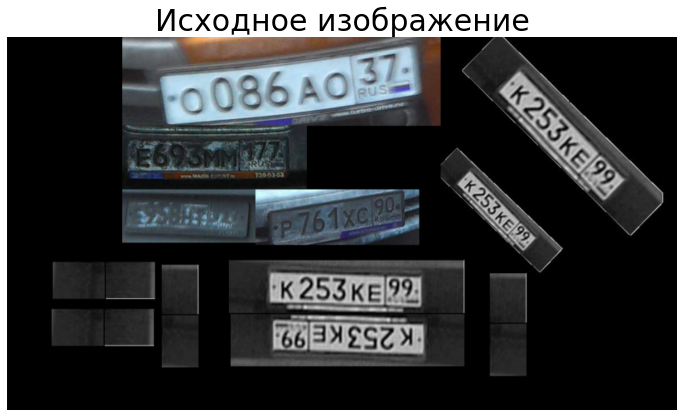

In [176]:
import cv2
img = cv2.imread('./car_numbers.png')
plot_image(img, title='Исходное изображение')

In [177]:
license_plate_cascade = cv2.CascadeClassifier('haarcascade_russian_plate_number.xml')

In [178]:
def makeRotations(prepared_img, res_image, angle):
    global cnt
    prepared_img = rotateImage(prepared_img, angle)
    res_image = rotateImage(res_image, angle)
    gray_rotated = cv2.cvtColor(prepared_img, cv2.COLOR_BGR2GRAY)
    license_plates = license_plate_cascade.detectMultiScale(gray_rotated)

    was_found = False
    for (x, y, w, h) in license_plates:
        if (w > 2 * h) and (w * h > 6000):
            start_point = (x + int(w * 0.1), y + int(h * 0.15))
            end_point = (start_point[0] + int(w * 0.8), start_point[1] + int(h * 0.7))
            cv2.rectangle(res_image, start_point, end_point, (255,0,0), 2)
            cv2.rectangle(prepared_img, start_point, end_point, (255,0,0), cv2.FILLED)
            was_found = True
            cnt += 1

    # if was_found:
    #     plot_image(prepared_img, title='Поворот на ' + str(angle) + ' градусов')

    prepared_img = rotateImage(prepared_img, -angle)
    res_image = rotateImage(res_image, -angle)
    return prepared_img, res_image

In [179]:
import imutils

prepared_img = img.copy()
cv2.rectangle(prepared_img, (0, 0), (img.shape[1], img.shape[0]), (0, 255, 0), 2)
prepared_img = imutils.rotate_bound(prepared_img, 45)
prepared_img = imutils.rotate_bound(prepared_img, -45)
# plot_image(prepared_img, labels=['Prepared image for rotation'])

res_image = prepared_img.copy()

cnt = 0
prepared_img, res_image = makeRotations(prepared_img, res_image, 0)
prepared_img, res_image = makeRotations(prepared_img, res_image, -9)
prepared_img, res_image = makeRotations(prepared_img, res_image, 45)

Обнаружено номеров:  8


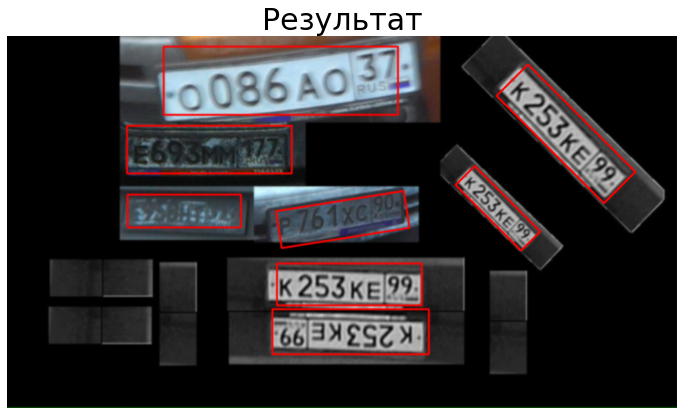

In [180]:
source_w, source_h = img.shape[1], img.shape[0]
res_w, res_h = prepared_img.shape[1], prepared_img.shape[0]

offset_x, offset_y = (res_w - source_w) // 2, (res_h - source_h) // 2
cropped_image = res_image[offset_y + 5: source_h + offset_y, offset_x + 5 : source_w + offset_x - 2]

print('Обнаружено номеров: ', cnt)
plot_image(cropped_image, title='Результат')